<a href="https://colab.research.google.com/github/Nsarkar-XLR8/ML_Code/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc


 Load Example Dataset

In [2]:
# Load dataset
from sklearn.datasets import load_diabetes
data = load_diabetes(as_frame=True)

# Simulate binary classification task
df = data.frame
df['Outcome'] = (df['target'] > 150).astype(int)  # Classify target > 150 as 1, otherwise 0
X = df.drop(columns=['target', 'Outcome'])
y = df['Outcome']

# Check the dataset
print("First 5 rows of the dataset:")
print(df.head())


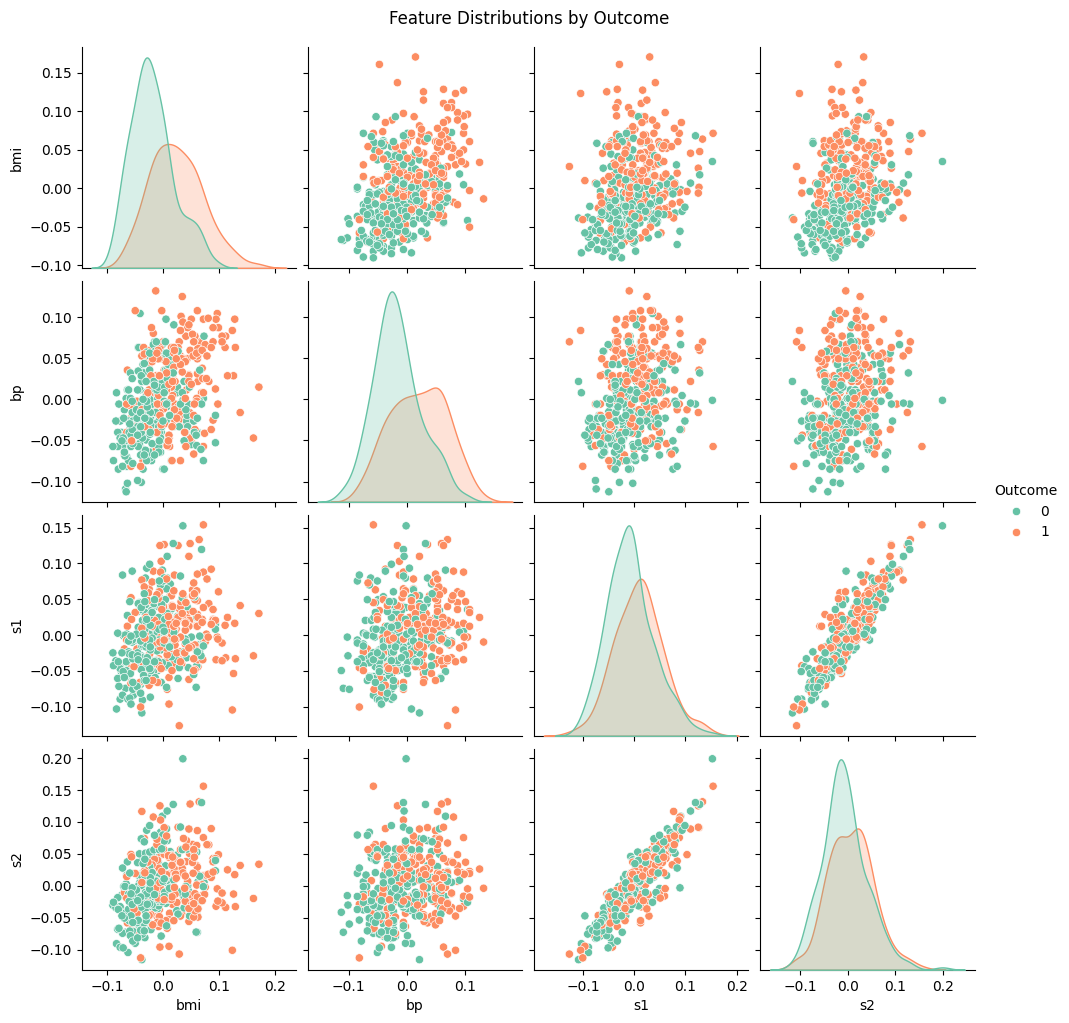

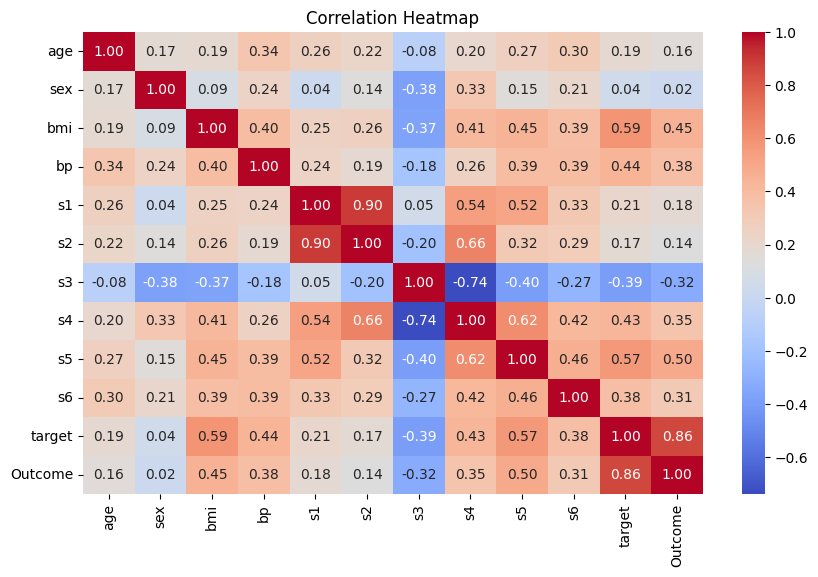

In [8]:
# Pairplot to visualize features (pick a subset for simplicity)
sns.pairplot(df[['bmi', 'bp', 's1', 's2', 'Outcome']], hue='Outcome', palette='Set2')
plt.suptitle("Feature Distributions by Outcome", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


 Split Data Into Training and Testing Sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data Size: {X_train.shape}")
print(f"Test Data Size: {X_test.shape}")


Training Data Size: (353, 10)
Test Data Size: (89, 10)


Train Logistic Regression Model

In [10]:
# Initialize and train the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Print coefficients
print("Feature Coefficients:")
for feature, coef in zip(X.columns, log_reg.coef_[0]):
    print(f"{feature}: {coef:.4f}")


Feature Coefficients:
age: 0.6732
sex: -0.5309
bmi: 2.5707
bp: 2.2237
s1: 0.5398
s2: 0.1327
s3: -1.4800
s4: 1.4541
s5: 2.6192
s6: 1.6588


Make Predictions

In [11]:
# Predict on test data
y_pred = log_reg.predict(X_test)


Visualize Model Predictons

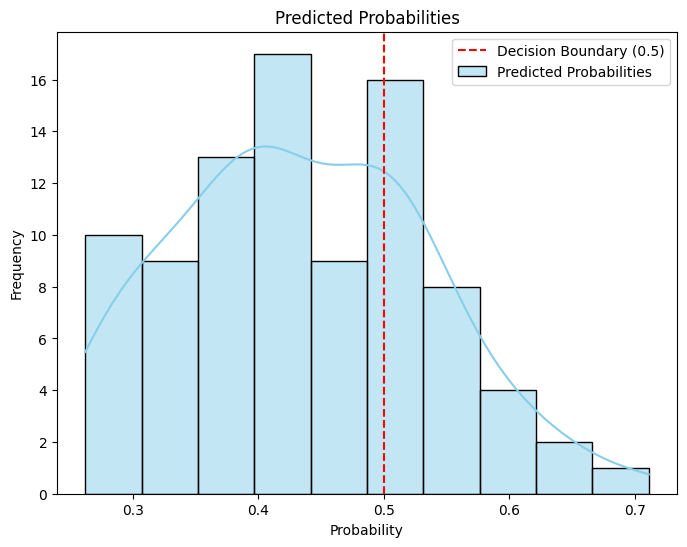

In [12]:
# Predict probabilities and class labels
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]  # Probabilities for class 1
y_pred = log_reg.predict(X_test)

# Plot the predicted probabilities
plt.figure(figsize=(8, 6))
sns.histplot(y_pred_prob, bins=10, kde=True, color='skyblue', label='Predicted Probabilities')
plt.axvline(0.5, color='red', linestyle='--', label='Decision Boundary (0.5)')
plt.title("Predicted Probabilities")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.legend()
plt.show()


Evaluate the Model

Accuracy: 0.79


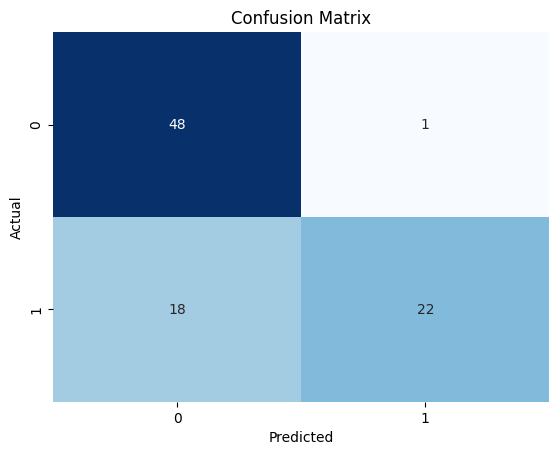


Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.98      0.83        49
           1       0.96      0.55      0.70        40

    accuracy                           0.79        89
   macro avg       0.84      0.76      0.77        89
weighted avg       0.83      0.79      0.77        89



In [13]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


ROC Curve and AUC

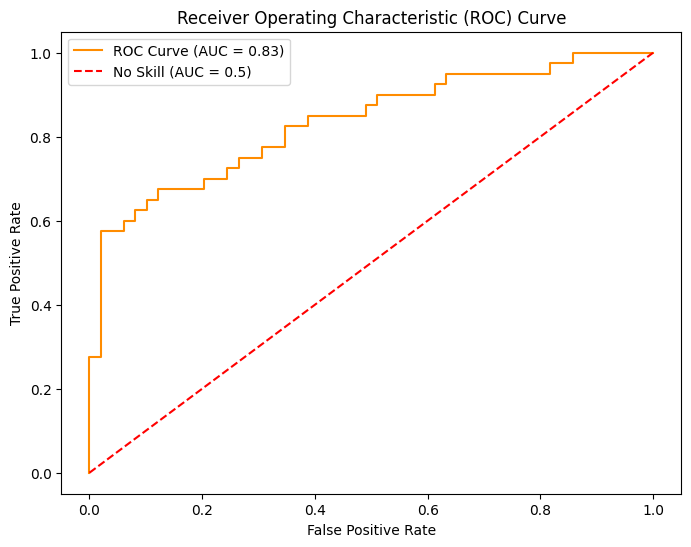

In [14]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], 'r--', label='No Skill (AUC = 0.5)')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()
